In [21]:
import pickle
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

sys.path.append("../")
from utils.preprocessing import *

### predict using the model

In [23]:
[features, scaled_features] = np.load('../processed_data/features_video_exp_16.npy', allow_pickle=True)
with open('/Users/kaycei/K on Server (NoMachine)/KayCei/comprehensive_behavior_model.pkl', 'rb') as fr:
    model = pickle.load(fr)
predictions = model.predict(features)

In [24]:
behavior_nonest_cats = ['torso_groom', 'investigate_0', 'unsure_0', 'wall_rear_0', 'rear_0',
                        'unsure_2', 'rear', 'investigate_1', 'investigate_2', 'right_itch',
                        'investigate_3', 'sleep_scrunch_0', 'sleep_scrunch_1', 'wall_rear_1', 
                        'right_body_groom','face_groom_1', 'dive_scrunch', 'head_groom', 'left_orient', 'left_investigate',
                        'face_groom_2', 'left_body groom', 'left_itch_1', 'left_itch_2', 
                        'face_groom_3','paw_groom', 'locomotion', 'right_forepaw_orient', 'right_orient']

len(behavior_nonest_cats), model.n_classes_

(29, 29)

In [25]:
behavior_nonest_cats.index('face_groom_1')

15

In [26]:
behavior_nonest_merged = [6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 28]
len(behavior_nonest_merged)

16

In [27]:
total_counts = {key:  [] for key in [behavior_nonest_cats[j] 
                                     for j in behavior_nonest_merged]}

for i in behavior_nonest_merged:
    total_counts[behavior_nonest_cats[i]] = len(np.where(predictions==i)[0])

In [28]:
df_counts_100ms = pd.DataFrame(total_counts, index=[0])
df_counts_100ms.to_csv('../test_behavior_counts.csv', index=None)

In [29]:
%store -r save_path
# Check if save_path is defined
if save_path:
    filename = os.path.join(save_path, 'test_behavior_counts.csv')
    df_counts_100ms.to_csv(filename, index=None)
    print(f'Saved the CSV file to {filename}')
else:
    print("Variable 'save_path' is not defined.")

Saved the CSV file to /Users/kaycei/K on Server (NoMachine)/KayCei/AD6-D2/videos/071823-rt bilateral sham/test_behavior_counts.csv


In [30]:
total_loco = len(np.where(predictions==behavior_nonest_cats.index('locomotion'))[0])
total_contra = len(np.where(predictions==behavior_nonest_cats.index('contra_orient'))[0])

ValueError: 'contra_orient' is not in list

In [31]:
comp_loco_contra = [total_loco, total_contra]
plt.bar(np.arange(len(comp_loco_contra)), comp_loco_contra)

NameError: name 'total_contra' is not defined

### place side-by-side to visualize pattern

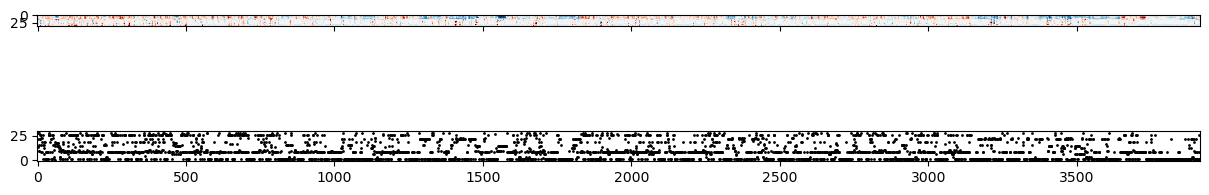

In [32]:
# plot scaled features with the corresponding predictions
fig, ax = plt.subplots(2, 1, figsize=(15, 3), gridspec_kw={'height_ratios': [6, 1]}, sharex=True)
# first 30 seconds
ax[0].imshow(scaled_features.T[:, ::10], vmin=-2, vmax=2, cmap='RdBu_r')
ax[1].scatter(np.arange(len(predictions[::10])), predictions[::10], s=1, color='k')
plt.show()

In [33]:
predictions[:50]

array([21, 21, 26, 13, 13, 21, 13, 21, 21, 13, 13, 26,  1, 28, 28, 27,  8,
        8,  8, 26, 28,  9, 26, 18,  1,  9,  9,  1,  1,  1,  9,  6,  6,  1,
        1,  1,  1,  1,  1,  6, 15,  1,  1,  1, 26, 21, 21, 22, 21,  9])

In [34]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28]),
 array([ 131, 2557,   19,  180,    8,   20,  315,   12, 2096,  722,  242,
          27,  218,   60,  394,  380,  160,   66,  975,  118,  858,  243,
         265,    2,    2, 1495,  184,  854]))

### Save processed file

In [35]:
np.save('../processed_data/predict_video_2.npy', predictions)

In [36]:
%store -r save_path
np.save(os.path.join(save_path, 'predict_video_exp_16.npy'), predictions)

In [37]:
stim_on = 3
# in seconds, when did the animal perform behavior 2
behavior_times = np.where(predictions==stim_on)[0]/10
behavior_times

array([  21.4,   21.5,   26.3,   53.9,   54. ,   54.1,   54.3,   54.4,
         54.5,   54.6,   54.7,   75.3,   75.4,   75.5,   75.6,   75.7,
         75.8,   75.9,   76. ,   76.1,   76.2,   76.3,   76.4,   76.5,
         76.6,   76.7,   76.8,   76.9,   77. ,   77.1,   77.2,   78.7,
        102.6,  107. ,  114.5,  114.6,  186.6,  232. ,  234. ,  248.9,
        262.9,  342.2,  362.5,  362.6,  362.7,  367.2,  367.3,  470.9,
        475.7,  534.6,  611.4,  611.5,  670.8,  705.3,  722.3,  722.4,
        760.1,  845.3,  846. ,  847. ,  862. ,  865.4,  865.5,  930.3,
        930.4,  930.5,  930.6,  940.8,  940.9, 1143.5, 1143.6, 1143.7,
       1143.8, 1144. , 1144.1, 1190.4, 1210.7, 1229.6, 1302.9, 1306.3,
       1365.4, 1374.1, 1387.7, 1387.8, 1388.1, 1407. , 1547.9, 1580.2,
       1618.8, 1620. , 1620.4, 1620.5, 1620.8, 1620.9, 1621. , 1621.1,
       1621.3, 1621.9, 1622.1, 1622.2, 1622.3, 1622.4, 1622.5, 1622.6,
       1622.7, 1624. , 1624.1, 1624.2, 1624.3, 1624.4, 1624.5, 1627.5,
      

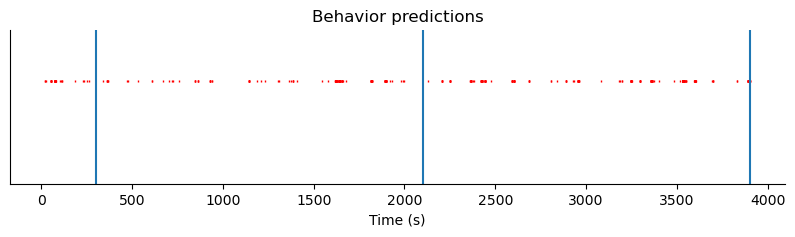

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
# ax.plot(onset_times,
#         np.ones_like(onset_times),
#         ls='', marker='|', markersize=1, c='k', alpha=1)
ax.plot(behavior_times,
        np.ones_like(behavior_times)+0.5,
        ls='', marker='|', markersize=1, c='r', alpha=1)
ax.set_yticks([])
ax.vlines(5*60, 0.5, 2)
ax.vlines(35*60, 0.5, 2)
ax.vlines(65*60, 0.5, 2)
ax.set_ylim([0.5, 2])

# ax.set_xlim([50, 100])
ax.set_title('Behavior predictions')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Time (s)')
plt.show()